<a href="https://colab.research.google.com/github/suyashi912/MLproject-Cardiotocography/blob/main/ML_finalcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive

Importing libraries and reading CSV file dataset 

In [3]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from yellowbrick.model_selection import learning_curve
from sklearn import datasets, metrics, model_selection, svm

In [4]:
import io
data = pd.read_csv("/content/drive/MyDrive/mlproject/CTG.csv")

In [5]:
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


PLOT - Distribution of 10 class dataset classification 

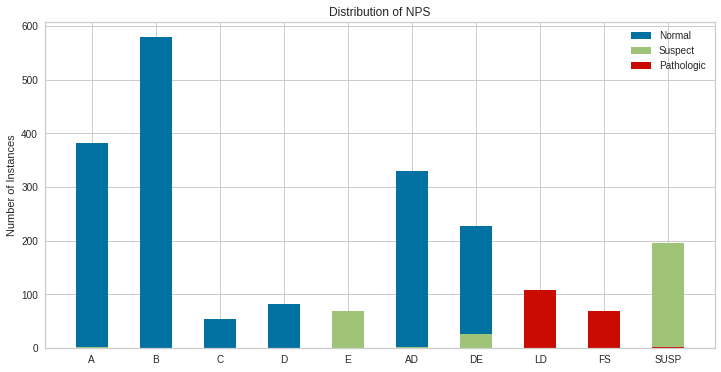

In [21]:
data_extra = data[['CLASS','NSP']]
zeroes_after = pd.DataFrame(data=np.zeros(10,),index=[1,2,3,4,5,6,7,8,9,10])
arranged = np.arange(10) 
plt.figure(figsize=(12,6))
for NSP_V in range(1,4):
    changed_norm = data_extra.loc[(data_extra['NSP']==NSP_V)].drop('NSP', axis=1)
    changed_norm = (pd.value_counts(changed_norm['CLASS'].values, sort=False)).sort_index()
    changed_norm = pd.DataFrame(data=changed_norm, index=changed_norm.index)
    changed_norm = zeroes_after.add(changed_norm,axis='index',fill_value=0) 
    changed_norm = (changed_norm.values).reshape(-1)
    if NSP_V == 1 :
        p1 = plt.bar(arranged,changed_norm, 0.50)
    elif NSP_V == 2 :
        p2 = plt.bar(arranged,changed_norm,0.50)
    elif NSP_V == 3 :
        p3 = plt.bar(arranged,changed_norm,0.50)
plt.xticks(arranged, ('A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.ylabel('Number of Instances')
plt.title('Distribution of NPS')

plt.legend((p1[0], p2[0], p3[0]), ('Normal', 'Suspect', 'Pathologic'))
plt.show()

FEATURE SELECTION 

In [22]:
#dropping unrequired columns 
data.drop(['FileName','Date', 'b','DR', 'LBE','SegFile','e','A','B','C','D','E','AD','DE','LD','FS','SUSP', 'CLASS'], inplace=True, axis=1)

In [23]:
data.dropna(axis = 0, how = 'any', inplace = True)

In [24]:
data

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,0.0,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,0.0,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,0.0,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,0.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   ASTV      2126 non-null   float64
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   float64
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   float64
 9   DS        2126 non-null   float64
 10  DP        2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

CLEANING DATA 

In [26]:
#removing duplicate data points 
data = data.drop_duplicates()

In [27]:
#No null data left 
data.isnull().sum().sum()

data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


NORMALIZATION OF DATA 

In [28]:
#normalization 
from sklearn.preprocessing import MinMaxScaler

label = 'NSP'
X = data.drop(label, axis = 1)
Y = data[label]

normalize = MinMaxScaler()

X[X.columns] = normalize.fit_transform(X[X.columns])
X.head()
print(np.shape(X), np.shape(Y))

(2112, 21) (2112,)


DATA VISUALIZATION 

1) DISTRIBUTION OF DATA IN CLASSES - BAR GRAPH 


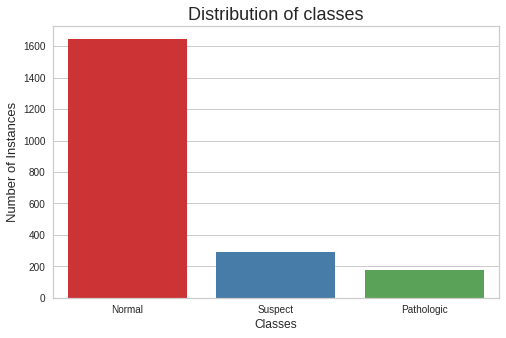

LB                                      ... Tendency                    
      count        mean       std    min    25%  ...      min  25%  50%  75%  max
NSP                                              ...                             
1.0  1646.0  131.998177  9.451492  106.0  125.0  ...     -1.0  0.0  0.0  1.0  1.0
2.0   292.0  141.650685  7.921950  120.0  137.0  ...     -1.0  0.0  0.0  1.0  1.0
3.0   174.0  131.563218  9.380463  110.0  128.0  ...     -1.0 -1.0  0.0  0.0  1.0

[3 rows x 168 columns]

In [29]:
# DISTRIBUTION OF DATA IN CLASSES - BAR GRAPH
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x = 'NSP', data = data, palette = 'Set1')
plt.xticks(np.arange(3), ('Normal','Suspect', 'Pathologic'))
plt.xlabel('Classes', fontsize = 12)
plt.ylabel('Number of Instances', fontsize=13)
plt.title('Distribution of classes', fontsize = 18)
plt.show()
data.groupby("NSP").describe()

PLOT OF FEATURE CORRELATION HEATMAP 

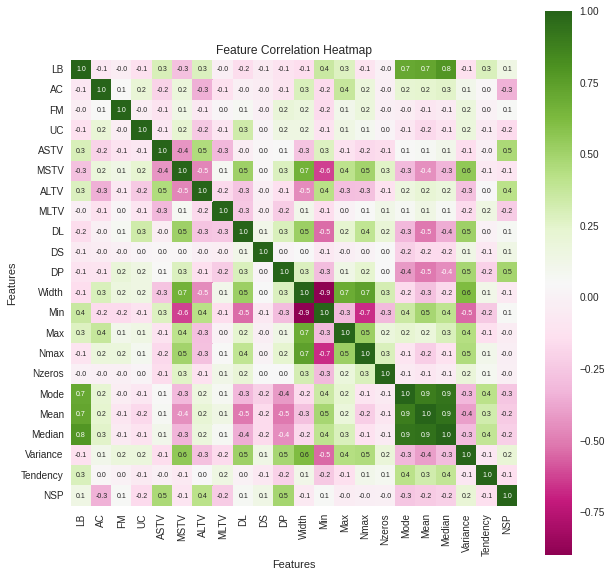

In [30]:
# plot heatmap 
correlation = data.corr()
correlation.shape
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':7}, cmap="PiYG")
plt.title('Feature Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


BOXPLOT OF FEATURES 

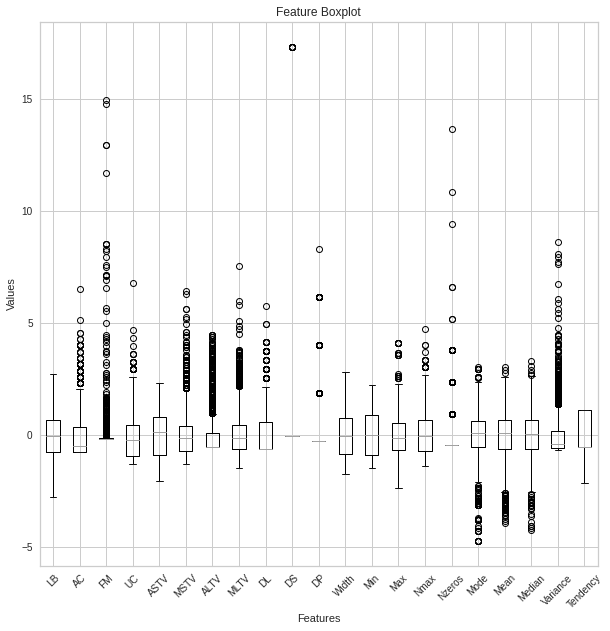

In [31]:
import sklearn 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
X1 = data.drop('NSP', axis = 1)
df_scale_X = pd.DataFrame(sklearn.preprocessing.scale(X1), columns=X1.columns)
df_scale_X.boxplot(ax=ax, rot=45)
plt.title('Feature Boxplot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [32]:
# RANDOM OVERSAMPLING 

In [33]:
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X, Y = oversample.fit_resample(X, Y)
print(np.shape(X), np.shape(Y))

(3584, 21) (3584,)


In [34]:
from sklearn.model_selection import train_test_split, KFold , StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

TRAIN TEST SPLIT 

In [35]:

dataframe = data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)


DIMENSIONALITY REDUCTION USING PCA AND AUTO ENCODERS 

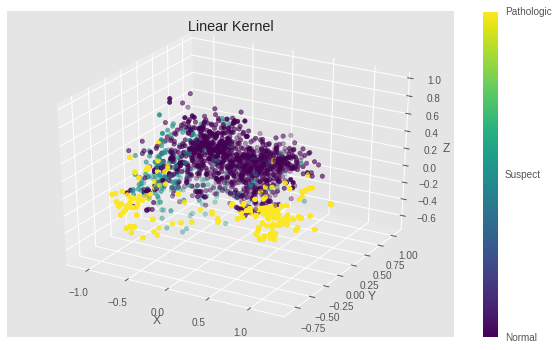

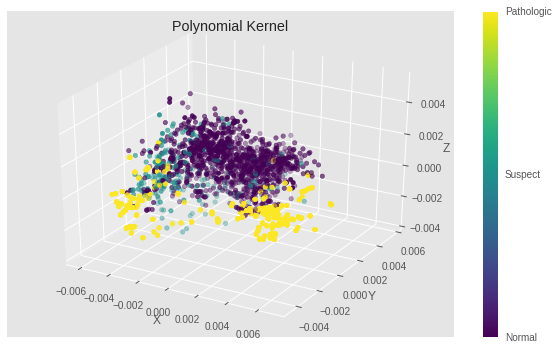

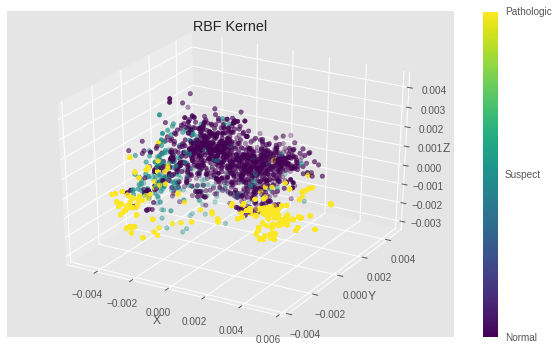

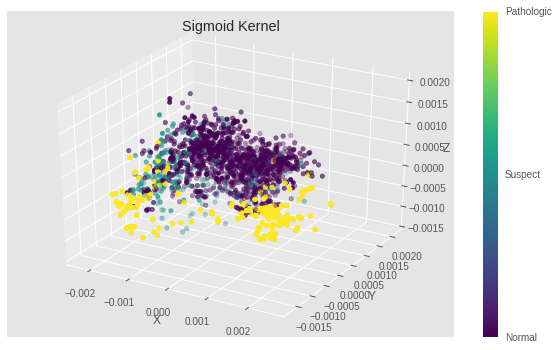

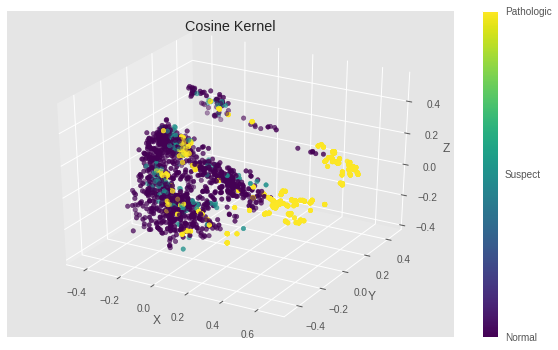

In [36]:
# dimensionality reduction

from sklearn.decomposition import KernelPCA

names = ['Linear Kernel','Polynomial Kernel','RBF Kernel','Sigmoid Kernel','Cosine Kernel']

classifiers = [
KernelPCA(n_components = 3, kernel = 'linear'),
KernelPCA(n_components = 3, kernel = 'poly', gamma= 0.00001),
KernelPCA(n_components = 3, kernel = 'rbf', gamma= 0.00001), KernelPCA(n_components = 3, kernel = 'sigmoid', gamma= 0.00001), KernelPCA(n_components = 3, kernel = 'cosine',gamma=0.00001)
]

models=zip(names,classifiers)
   
for name, model_param in models:
    X_PCA = model_param.fit_transform(x_train)
    from mpl_toolkits.mplot3d import axes3d
    from matplotlib import style
    style.use('ggplot')
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(111, projection='3d')
    loc = [1,2,3]
    classes = ['Normal','Suspect','Pathologic']
    x3d = X_PCA[:,0]
    y3d = X_PCA[:,1]
    z3d = X_PCA[:,2]
    plot = ax1.scatter(x3d, y3d, z3d, c=y_train, cmap="viridis" )
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    cb = plt.colorbar(plot)
    cb.set_ticks(loc)
    cb.set_ticklabels(classes)
    plt.title(name)
    plt.show()


As could be seen in the above graphs, PCA technique could not distingush well the different classes and could not perform efficiently in separating the above in Normal, Suspect, and Pathelogic. Interesting thing seen here is that suspect in one or two kernals is seen to be closer in the graphs to normal and in others closer to pathelogical. 

In [37]:
# using AE(autoencoder) 
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X_scaled = minmax_scale(X, axis = 0)
ncol = 20 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scaled, Y, train_size = 0.7, random_state = seed(2017))
 
Class_train_1 = X_train_1[:, 20] 
Class_test_1 = X_test_1[:,20] 

X_train_1 = np.delete(X_train_1, 20, 1)  
X_test_1 = np.delete(X_test_1, 20, 1)  

input_dim = Input(shape = (ncol, ))

encoding_dim = 3

encoded = Dense(encoding_dim, activation = 'relu')(input_dim)

decoded = Dense(ncol, activation = 'sigmoid')(encoded)

autoencoder = keras.models.Model(inputs = input_dim, outputs = decoded)

autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.fit(X_train_1, X_train_1, epochs = 150, batch_size = 25, shuffle = True, validation_data = (X_test_1, X_test_1))

encoder = Model(inputs = input_dim, outputs = encoded)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test_1)

Epoch 1/150
101/101 [==============================] - 1s 4ms/step - loss: 0.6919 - val_loss: 0.6917
Epoch 2/150
101/101 [==============================] - 0s 3ms/step - loss: 0.6918 - val_loss: 0.6916
Epoch 3/150
101/101 [==============================] - 0s 3ms/step - loss: 0.6917 - val_loss: 0.6915
Epoch 4/150
101/101 [==============================] - 0s 3ms/step - loss: 0.6915 - val_loss: 0.6914
Epoch 5/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6914 - val_loss: 0.6912
Epoch 6/150
101/101 [==============================] - 0s 3ms/step - loss: 0.6913 - val_loss: 0.6911
Epoch 7/150
101/101 [==============================] - 0s 3ms/step - loss: 0.6912 - val_loss: 0.6910
Epoch 8/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6910 - val_loss: 0.6908
Epoch 9/150
101/101 [==============================] - 0s 3ms/step - loss: 0.6909 - val_loss: 0.6907
Epoch 10/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6907 - val_lo

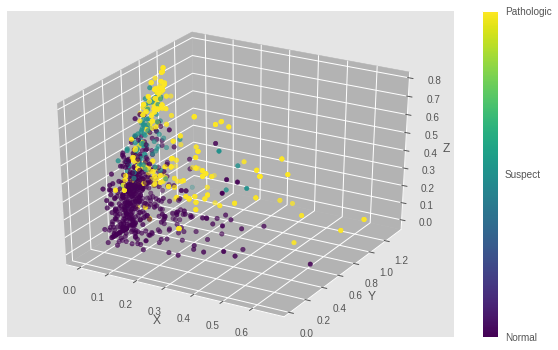

In [38]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
style.use('ggplot')

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')
ax1.w_xaxis.set_pane_color((0.7, 0.7, 0.7, 1.0))
ax1.w_yaxis.set_pane_color((0.7, 0.7, 0.7, 1.0)) 
ax1.w_zaxis.set_pane_color((0.7, 0.7, 0.7, 1.0)) 

x3d = encoded_out[:,0]
y3d = encoded_out[:,1]
z3d = encoded_out[:,2]

plot = ax1.scatter(x3d, y3d, z3d, c=y_test_1, cmap="viridis", marker='o')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
cb = plt.colorbar(plot)
cb.set_ticks(loc)
cb.set_ticklabels(classes)
plt.show()

K FOLD CROSS VALIDATION 

In [39]:
#K fold cross validation 

kf = KFold(n_splits=3, shuffle=True, random_state=786)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
for train, test in kf.split(x_train):
  print(x_train[train].shape, y_train[train].shape, x_train[test].shape, y_train[test].shape)

(1672, 21) (1672,) (836, 21) (836,)
(1672, 21) (1672,) (836, 21) (836,)
(1672, 21) (1672,) (836, 21) (836,)


In [40]:
accuracy_models = []
precision_models = []
recall_models = []
f1score_models = []

In [41]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

In [42]:
def make_ROC1(model):
  y_pred = model.predict_proba(x_test)
  skplt.metrics.plot_roc_curve(y_test, y_pred)
  plt.show()

MODELS

LOGISTIC REGRESSION 

In [ ]:
def GridSearchCV_lr(x_train, y_train): 
  pipe_line = Pipeline([('classifier1' , LogisticRegression(random_state = 0))])
  param_grid = [
    {'classifier1' : [LogisticRegression(solver = 'saga', max_iter = 5000, random_state = 0)],
     'classifier1__penalty' : ['l1', 'l2'],
    'classifier1__C' : np.logspace(-4, 4, 10),
    'classifier1__multi_class' : ['ovr', 'multinomial']},
    {'classifier1' : [LogisticRegression(max_iter = 3000, random_state = 0)],
     'classifier1__penalty' : ['l2'],
    'classifier1__C' : np.logspace(-4, 4, 10),
    'classifier1__multi_class' : ['ovr', 'multinomial'], 
     'classifier1__solver' : ['sag', 'newton-cg']}
  ]
  gs = GridSearchCV(estimator=pipe_line,param_grid=param_grid)
  gs.get_params().keys()
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_params_

In [ ]:
print(GridSearchCV_lr(x_train, y_train))

{'classifier1': LogisticRegression(C=166.81005372000558, max_iter=5000,
                   multi_class='multinomial', penalty='l1', random_state=0,
                   solver='saga'), 'classifier1__C': 166.81005372000558, 'classifier1__multi_class': 'multinomial', 'classifier1__penalty': 'l1'}


In [ ]:
def train_logistic_regression(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_lr = LogisticRegression(C=166.81005372000558, max_iter=5000, penalty='l1', solver='saga', multi_class = 'multinomial', random_state = 0)
    model_lr.fit(x_train,y_train)
    y_pred_lr = model_lr.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_lr) 
    accuracy_scores_log.append((accuracy))
  return model_lr 
  
model_lr = train_logistic_regression(x_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
def print_confusion_matrix(model): 
  y_pred = model.predict(x_test)
  conf = confusion_matrix(y_test,np.round(y_pred))
  label = ["N","S","P"]
  sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
  plt.show()

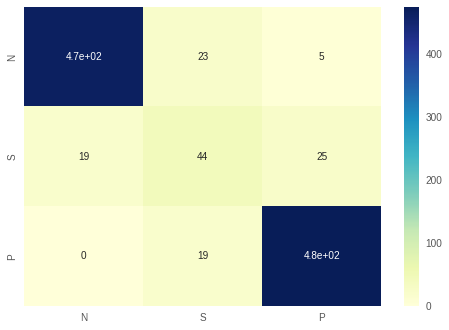

In [ ]:
print_confusion_matrix(model_lr)

In [ ]:
def print_metrics(model): 
  y_pred_lr = model.predict(x_test)
  clf_report = classification_report(y_test, y_pred_lr,target_names=label, output_dict=True)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  precision=precision_score(y_test, y_pred_lr,average='weighted')*100
  print("Precision: ", precision)
  recall=recall_score(y_test, y_pred_lr,average='weighted')*100
  print("Recall: ", recall)
  accuracy=accuracy_score(y_test, y_pred_lr)*100
  print("Accuracy: ", accuracy)
  f1 = f1_score(y_test,y_pred_lr,average='weighted')*100
  print("F1 score: ", f1)
  return accuracy, precision, recall, f1

Precision:  91.47993901867105
Recall:  91.54275092936803
Accuracy:  91.54275092936803
F1 score:  91.50181042044517


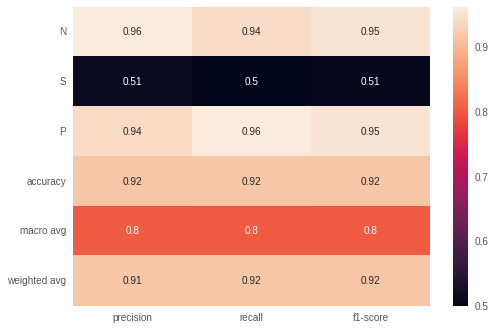

In [ ]:
accuracy, precision, recall, f1 = print_metrics(model_lr)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

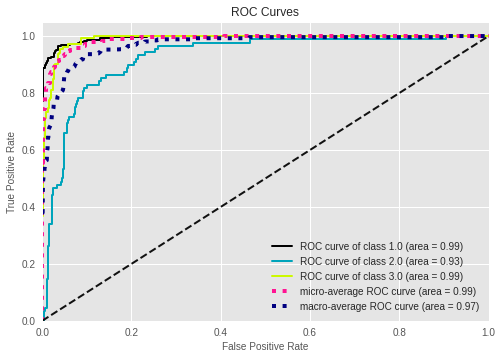

In [ ]:
make_ROC1(model_lr)

K NEAREST NEIGHBORS 

In [ ]:
def GridSearchCV_knn(x_train, y_train): 
  classifier = KNeighborsClassifier()
  param_grid = {
     'weights' : ['uniform', 'distance'], 
     'n_neighbors' : range(1, 30), 
     'metric' : ['euclidean', 'manhattan'], 
     'algorithm' : ['ball_tree', 'kd_tree'], 
  }
  gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_


In [ ]:
print(GridSearchCV_knn(x_train, y_train))

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=1)


In [ ]:
def train_knn(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_knn = KNeighborsClassifier(n_neighbors= 1, metric = 'euclidean', weights = 'distance', algorithm = 'ball_tree')
    model_knn.fit(x_train,y_train)
    y_pred_knn = model_knn.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_knn) 
    accuracy_scores_log.append((accuracy))
  return model_knn 
  
model_knn = train_knn(x_train, y_train)

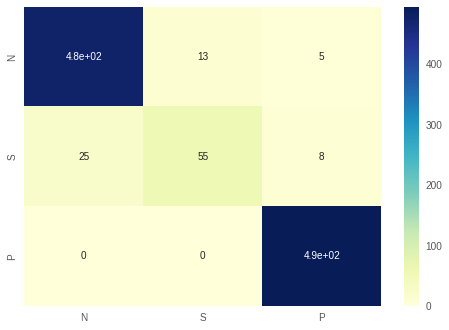

In [ ]:
print_confusion_matrix(model_knn)

Precision:  94.96831833817605
Recall:  95.26022304832715
Accuracy:  95.26022304832715
F1 score:  95.00808121906176


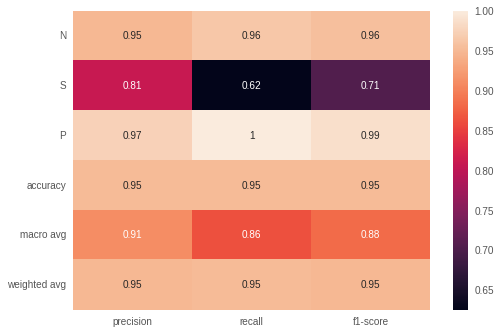

In [ ]:
accuracy, precision, recall, f1 = print_metrics(model_knn)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

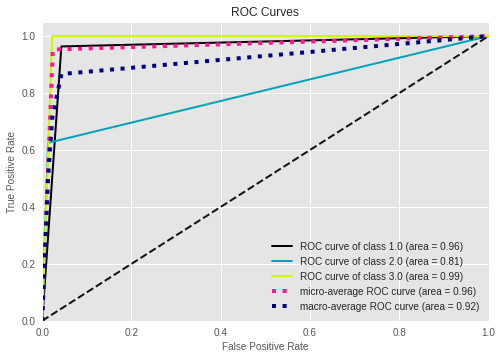

In [ ]:
make_ROC1(model_knn)

DESCISION TREES 

In [ ]:
def GridSearchCV_dt(x_train, y_train): 
  classifier = DecisionTreeClassifier(random_state = seed(7))
  param_grid = {
     "max_depth": range(5, 30),
     "criterion" : ["gini", "entropy"], 
     "splitter" : ['best', 'random'], 
     "max_features" : ['auto', 'sqrt', 'log2']
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_


In [ ]:
print(GridSearchCV_dt(x_train, y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features='auto')


In [ ]:
def train_dt(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_dt = DecisionTreeClassifier(max_depth = 18, criterion = "entropy", splitter = "best", max_features = "auto" , random_state=seed(7))
    model_dt.fit(x_train,y_train)
    y_pred_dt = model_dt.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_dt) 
    accuracy_scores_log.append((accuracy))
  return model_dt 
  
model_dt = train_dt(x_train, y_train)

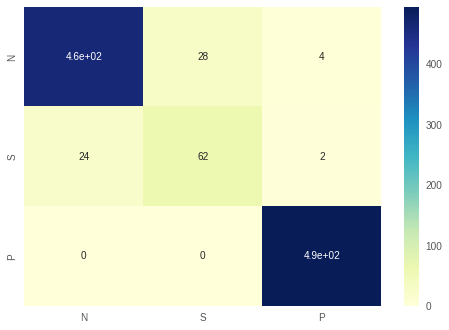

In [ ]:
print_confusion_matrix(model_dt)

Precision:  94.6374684473817
Recall:  94.6096654275093
Accuracy:  94.6096654275093
F1 score:  94.61830000091608


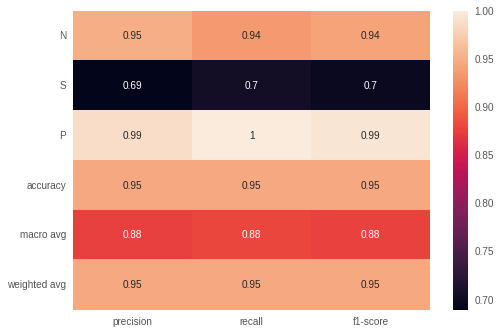

In [ ]:
accuracy, precision, recall, f1 = print_metrics(model_dt)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

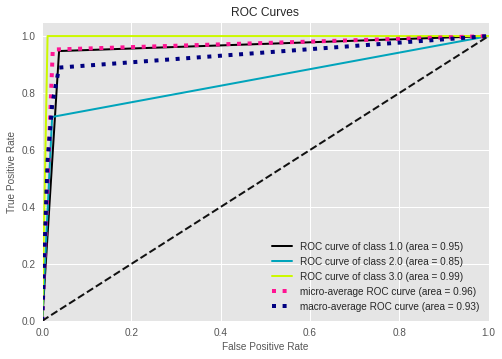

In [ ]:
make_ROC1(model_dt)

RANDOM FORESTS 

In [ ]:
def GridSearchCV_rf(x_train, y_train): 
  classifier = RandomForestClassifier(random_state = 7)
  param_grid = {
      'n_estimators': [10,30,50,100,125,135,150,160, 200, 400], 
      'max_features': ['auto', 'sqrt', 'log2'], 
      "criterion" : ["gini", "entropy"], 
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_


In [ ]:
print(GridSearchCV_rf(x_train, y_train))

RandomForestClassifier(n_estimators=125, random_state=7)


In [ ]:
def train_rf(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_rf = RandomForestClassifier(n_estimators=125, criterion = "entropy", max_features = 'auto', )
    model_rf.fit(x_train,y_train)
    y_pred_rf = model_rf.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_rf) 
    accuracy_scores_log.append((accuracy))
  return model_rf 
  
model_rf = train_rf(x_train, y_train)



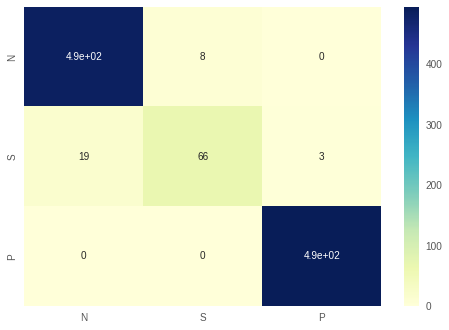

In [ ]:
print_confusion_matrix(model_rf)

Precision:  97.11138071789371
Recall:  97.21189591078067
Accuracy:  97.21189591078067
F1 score:  97.1056592212047


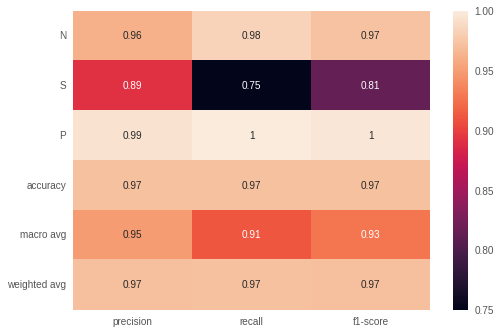

In [ ]:
accuracy, precision, recall, f1 = print_metrics(model_rf)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

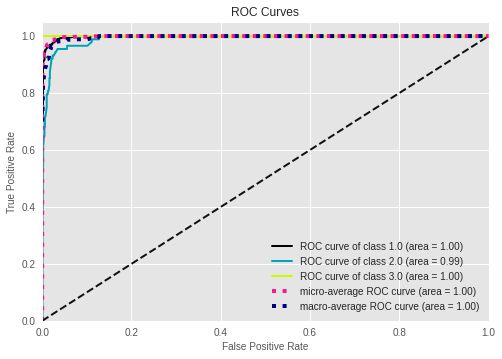

In [ ]:
make_ROC1(model_rf)

NAIVE BAYES 


In [ ]:
def train_nb(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_nb = GridSearchCV(estimator = GaussianNB(), param_grid = {'var_smoothing' : np.logspace(5, -10, num = 1000)}) 
    model_nb.fit(x_train,y_train)
    print(model_nb.best_estimator_)
    y_pred_nb = model_nb.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_nb) 
    accuracy_scores_log.append((accuracy))
  return model_nb

In [ ]:
model_nb = train_nb(x_train, y_train)

GaussianNB(var_smoothing=0.11325413151528127)
GaussianNB(var_smoothing=0.11325413151528127)
GaussianNB(var_smoothing=0.11325413151528127)


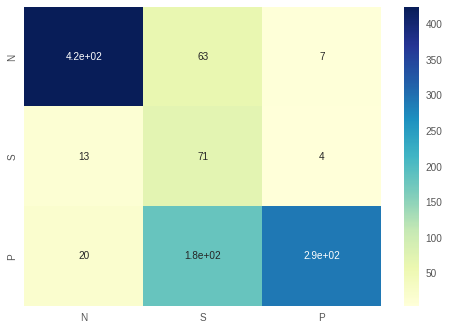

In [ ]:
print_confusion_matrix(model_nb)

Precision:  88.67717342662735
Recall:  73.14126394052045
Accuracy:  73.14126394052045
F1 score:  77.45394312641466


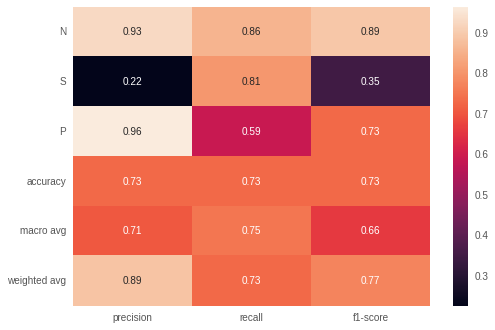

In [ ]:
accuracy, precision, recall, f1 = print_metrics(model_nb)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

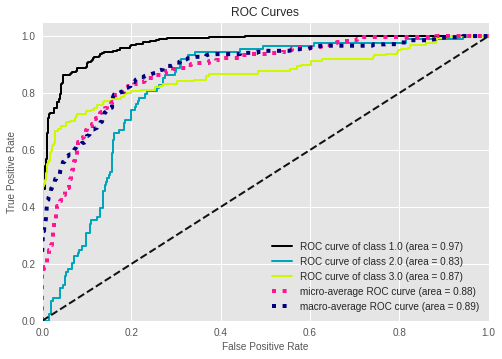

In [ ]:
make_ROC1(model_nb)

AdaBoost 

In [60]:
from sklearn.ensemble import AdaBoostClassifier
def GridSearchCV_ada(x_train, y_train): 
  classifier = AdaBoostClassifier(random_state = seed(7))
  param_grid = {
    'n_estimators' : [10,30,50,100,125,135,150,160, 200, 400, 500, 1000], 
    "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
    'algorithm' : ['SAMME', 'SAMME.R']
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

In [ ]:
print(GridSearchCV_ada(x_train, y_train))

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=135)


In [ ]:
def train_ada(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_ada = AdaBoostClassifier(n_estimators =  135,  learning_rate = 1, algorithm = 'SAMME' )
    model_ada.fit(x_train,y_train)
    y_pred_ada = model_ada.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_ada) 
    accuracy_scores_log.append((accuracy))
  return model_ada 
  
model_ada = train_ada(x_train, y_train)

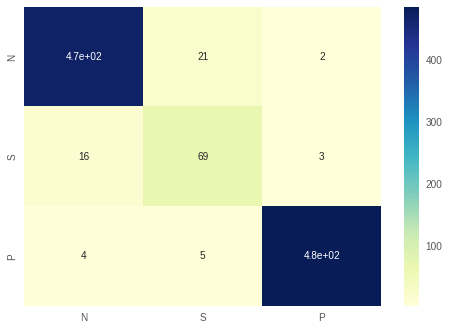

In [ ]:
print_confusion_matrix(model_ada)

Precision:  95.42312021881834
Recall:  95.26022304832715
Accuracy:  95.26022304832715
F1 score:  95.33147938844326


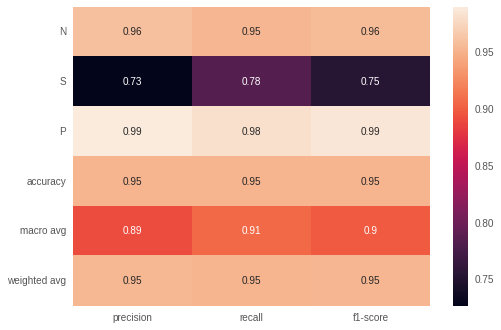

In [ ]:
accuracy, precision, recall, f1 = print_metrics(model_ada)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

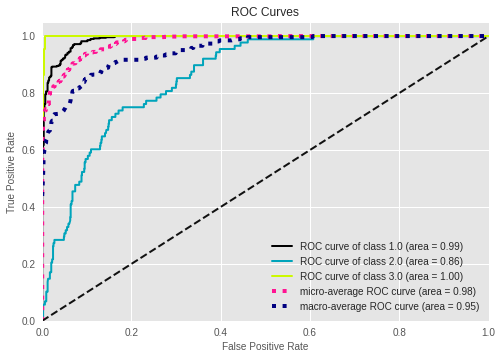

In [ ]:
make_ROC1(model_ada)

Bagging Classifier  

In [61]:
from sklearn.ensemble import BaggingClassifier
def GridSearchCV_bagging(x_train, y_train): 
  classifier = BaggingClassifier(random_state = seed(7), bootstrap = True)
  param_grid = {
    'n_estimators' : [10,30,50,100,125,135,150,160, 200, 400, 500, 1000], 
    'max_features' : [1, 2, 3, 4, 5, 10], 
    'bootstrap_features' : [True, False], 
    'oob_score' : [True, False]
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

In [ ]:

print(GridSearchCV_bagging(x_train, y_train))

BaggingClassifier(max_features=10, n_estimators=30, oob_score=True)


In [ ]:
def train_bagging(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_bag = BaggingClassifier(random_state = seed(7), bootstrap = True, max_features = 10, n_estimators = 30, oob_score= True)
    model_bag.fit(x_train,y_train)
    y_pred_bag = model_bag.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_bag) 
    accuracy_scores_log.append((accuracy))
  return model_bag
  
model_bag = train_bagging(x_train, y_train)

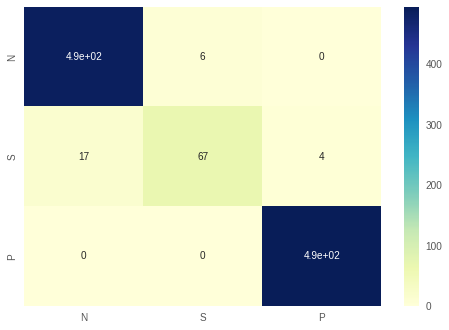

In [ ]:
print_confusion_matrix(model_bag)

Precision:  97.41352684306973
Recall:  97.4907063197026
Accuracy:  97.4907063197026
F1 score:  97.38633152115244


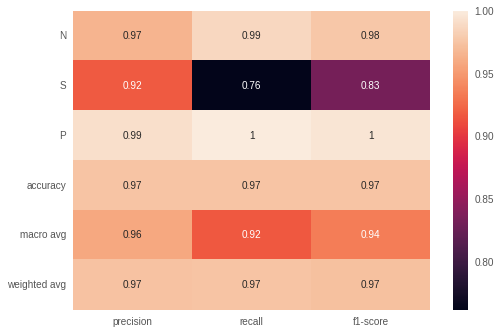

In [ ]:
accuracy, precision, recall, f1 = print_metrics(model_bag)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

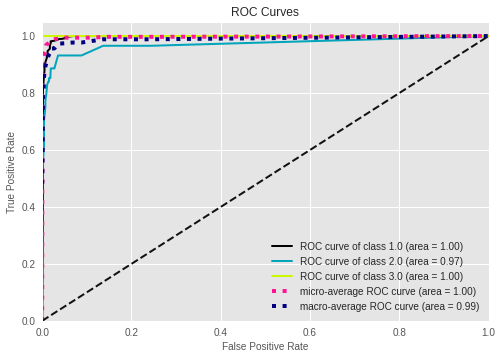

In [ ]:
make_ROC1(model_bag)

Support Vector Machine 

In [62]:
from sklearn.svm import SVC
def GridSearchCV_svc(x_train, y_train): 
  classifier = SVC(random_state = seed(7)) 
  param_grid = {
      'C' : np.logspace(-4, 4, 10),
      'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 
      'degree' : [2, 3, 4, 5, 6, 7, 8, 9, 10], 
      'gamma' : ['scale', 'auto']
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_


In [ ]:
print(GridSearchCV_svc(x_train, y_train))

SVC(C=166.81005372000558, degree=2)


In [ ]:
def train_svc(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_svc = SVC(random_state = seed(7), C =166.81005372000558, degree = 2)
    model_svc.fit(x_train,y_train)
    y_pred_svc = model_svc.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_svc) 
    accuracy_scores_log.append((accuracy))
  return model_svc
  
model_svc = train_svc(x_train, y_train)

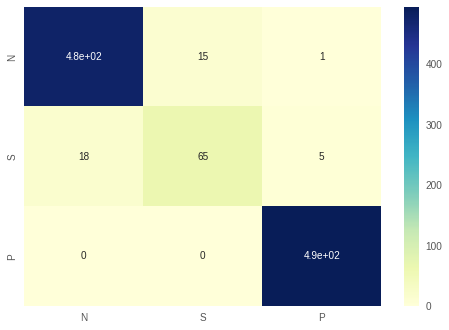

In [ ]:
print_confusion_matrix(model_svc)

Precision:  96.24949634248709
Recall:  96.37546468401487
Accuracy:  96.37546468401487
F1 score:  96.29625373433952


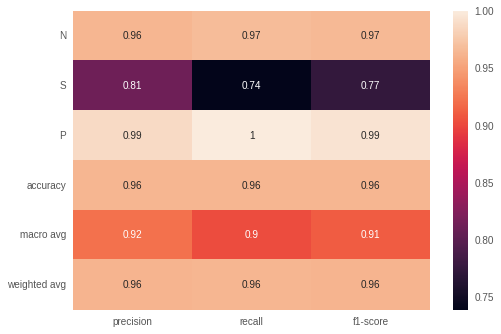

In [ ]:
accuracy, precision, recall, f1 = print_metrics(model_svc)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

In [ ]:
def make_ROC(model):
  y_pred = model.predict_proba(x_test)
  skplt.metrics.plot_roc_curve(y_test, y_pred)
  plt.show()

Multi Layer Perceptron 

In [63]:
from sklearn.neural_network import MLPClassifier
def GridSearchCV_mlp(x_train, y_train): 
  classifier = MLPClassifier(random_state=1, max_iter=300)
  param_grid = {
      'activation' : ['identity', 'relu', 'logistic', 'tanh'], 
      'solver' : ['lbfgs', 'sgd', 'adam'], 
      'learning_rate' : ['constant', 'invscaling', 'adaptive']
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_


In [ ]:

print(GridSearchCV_mlp(x_train, y_train))

MLPClassifier(activation='logistic', max_iter=300, random_state=1,
              solver='lbfgs')


In [ ]:
def train_mlp(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_mlp = MLPClassifier(random_state=1, max_iter=300,  solver='lbfgs', activation='logistic')
    model_mlp.fit(x_train,y_train)
    y_pred_mlp = model_mlp.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_mlp) 
    accuracy_scores_log.append((accuracy))
  return model_mlp
  
model_mlp = train_mlp(x_train, y_train)

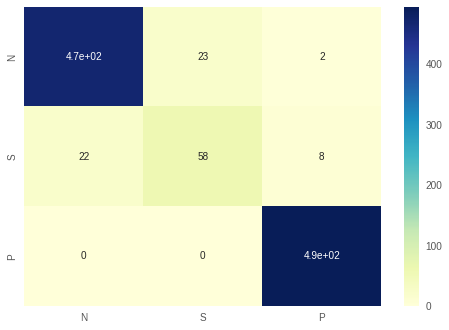

In [ ]:
print_confusion_matrix(model_mlp)

Precision:  94.70969691686712
Recall:  94.88847583643123
Accuracy:  94.88847583643123
F1 score:  94.78446965243914


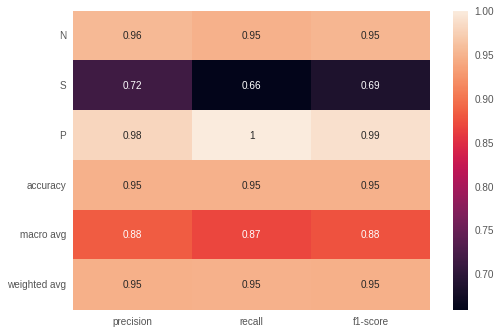

In [ ]:
accuracy, precision, recall, f1 = print_metrics(model_mlp)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

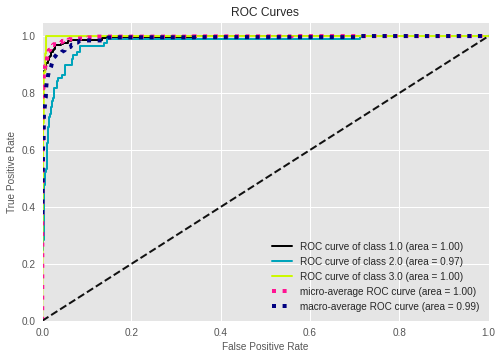

In [ ]:
make_ROC1(model_mlp)

In [ ]:
accuracy_models

[91.54275092936803,
 95.26022304832715,
 94.6096654275093,
 97.21189591078067,
 73.14126394052045,
 95.26022304832715,
 97.4907063197026,
 96.37546468401487,
 94.88847583643123,
 94.88847583643123]

In [ ]:
precision_models

[91.47993901867105,
 94.96831833817605,
 94.6374684473817,
 97.11138071789371,
 88.67717342662735,
 95.42312021881834,
 97.41352684306973,
 96.24949634248709,
 94.70969691686712,
 94.70969691686712]

In [ ]:
recall_models

[91.54275092936803,
 95.26022304832715,
 94.6096654275093,
 97.21189591078067,
 73.14126394052045,
 95.26022304832715,
 97.4907063197026,
 96.37546468401487,
 94.88847583643123,
 94.88847583643123]

In [ ]:
f1score_models

[91.50181042044517,
 95.00808121906176,
 94.61830000091608,
 97.1056592212047,
 77.45394312641466,
 95.33147938844326,
 97.38633152115244,
 96.29625373433952,
 94.78446965243914,
 94.78446965243914]

EVALUATION METRICS COMPARISON PLOT 

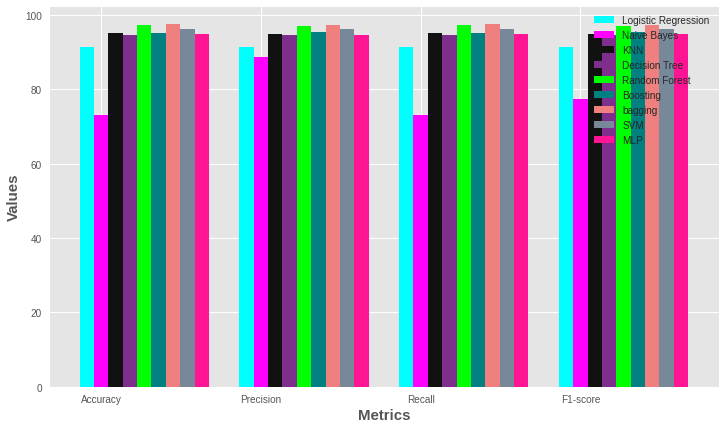

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.09
fig = plt.subplots(figsize =(12,7))
 
# set height of bar
LogisticRegression_arr = [accuracy_models[0],precision_models[0],recall_models[0],f1score_models[0]]
GaussianNB_arr = [accuracy_models[4],precision_models[4],recall_models[4],f1score_models[4]]
DecisionTreeClassifier_arr = [accuracy_models[2],precision_models[2],recall_models[2],f1score_models[2]]
RandomForestClassifier_arr = [accuracy_models[3],precision_models[3],recall_models[3],f1score_models[3]]
KNN_arr = [accuracy_models[1],precision_models[1],recall_models[1],f1score_models[1]]
Boosting_arr= [accuracy_models[5],precision_models[5],recall_models[5],f1score_models[5]]
Bagging_arr= [accuracy_models[6],precision_models[6],recall_models[6],f1score_models[6]]
SVM_arr= [accuracy_models[7],precision_models[7],recall_models[7],f1score_models[7]]
MLP_arr= [accuracy_models[8],precision_models[8],recall_models[8],f1score_models[8]]
# Set position of bar on X axis
br1 = np.arange(len(LogisticRegression_arr))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]


# Make the plot
plt.bar(br1, LogisticRegression_arr, color ='#00FFFF', width = barWidth,label ='Logistic Regression')
plt.bar(br2, GaussianNB_arr, color ='#FF00FF', width = barWidth, label ='Naive Bayes')
plt.bar(br3, KNN_arr, color ='k', width = barWidth, label ='KNN')
plt.bar(br4, DecisionTreeClassifier_arr, color ='#7E2F8E', width = barWidth, label ='Decision Tree')
plt.bar(br5, RandomForestClassifier_arr, color ='#00FF00', width = barWidth, label ='Random Forest')
plt.bar(br6, Boosting_arr, color ='teal', width = barWidth, label ='Boosting')
plt.bar(br7,Bagging_arr, color ='lightcoral', width = barWidth, label ='bagging')
plt.bar(br8, SVM_arr, color ='lightslategrey', width = barWidth, label ='SVM')
plt.bar(br9, MLP_arr, color ='deeppink', width = barWidth, label ='MLP')



# Adding Xticks
plt.xlabel('Metrics', fontweight ='bold', fontsize = 15)
plt.ylabel('Values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(LogisticRegression_arr))],
        ['Accuracy', 'Precision', 'Recall', 'F1-score'])
 
plt.legend()
plt.show()

ROC CURVES

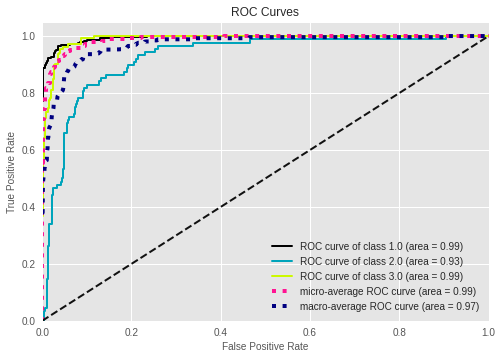

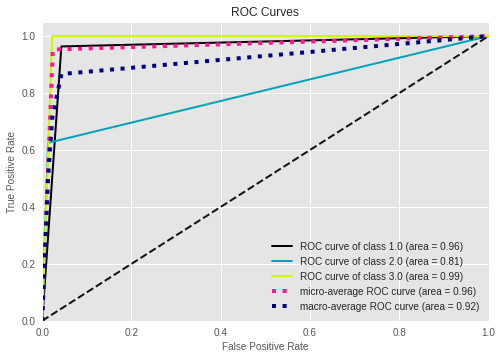

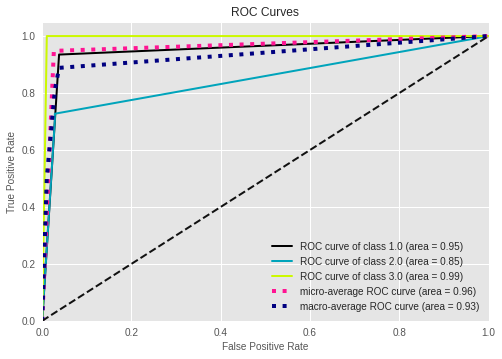

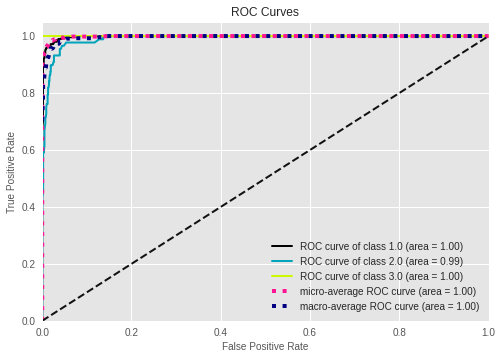

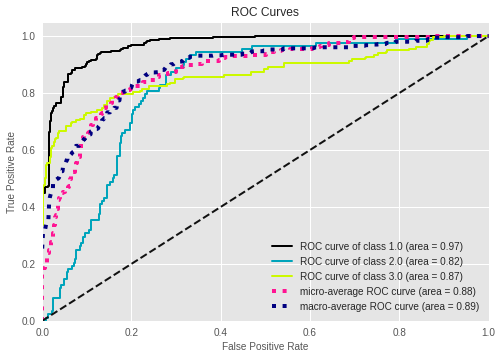

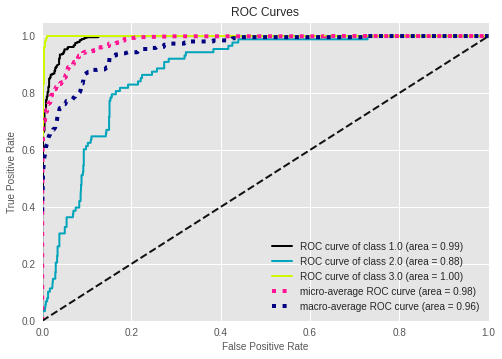

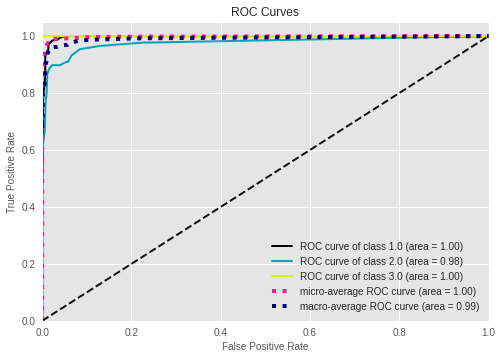

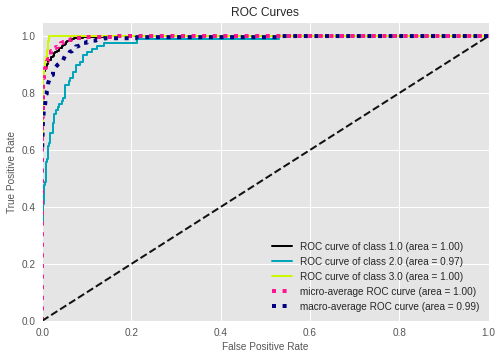

In [ ]:

make_ROC(model_knn)
make_ROC(model_dt)

make_ROC(model_rf)
make_ROC(model_nb)
make_ROC(model_ada)
make_ROC(model_bag)
make_ROC(model_mlp)

## **10 class Classification**

In [6]:
data_2 = pd.read_csv("/content/drive/MyDrive/mlproject/CTG.csv")

In [7]:
#dropping unrequired columns 
data_2.drop(['FileName','Date', 'b','DR', 'LBE','SegFile','e','A','B','C','D','E','AD','DE','LD','FS','SUSP', 'NSP'], inplace=True, axis=1)

In [8]:
data_2.dropna(axis = 0, how = 'any', inplace = True)

In [9]:
data_2.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0


In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   ASTV      2126 non-null   float64
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   float64
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   float64
 9   DS        2126 non-null   float64
 10  DP        2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [11]:
data_2 = data_2.drop_duplicates()

In [12]:
accuracy_models1=[]
precision_models1=[]
recall_models1=[]
f1score_models1=[]

In [13]:
from sklearn.preprocessing import MinMaxScaler

label = 'CLASS'
X_data2 = data_2.drop(label, axis = 1)
Y_data2 = data_2[label]

normalize = MinMaxScaler()

X_data2[X_data2.columns] = normalize.fit_transform(X_data2[X_data2.columns])
X_data2.head()
print(np.shape(X_data2), np.shape(Y_data2))

(2113, 21) (2113,)


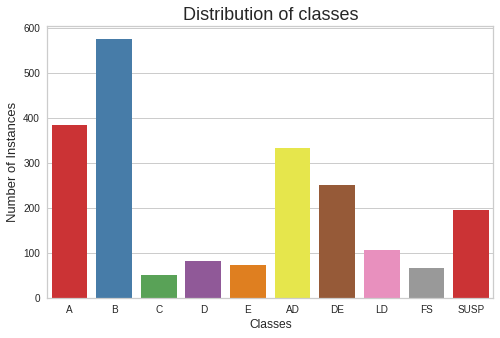

LB                                       ... Tendency                    
       count        mean        std    min    25%  ...      min  25%  50%  75%  max
CLASS                                              ...                             
1.0    383.0  132.845953  10.762295  106.0  125.0  ...     -1.0  0.0  0.0  1.0  1.0
2.0    575.0  132.513043  10.064223  106.0  125.0  ...     -1.0  0.0  0.0  1.0  1.0
3.0     51.0  129.725490   7.605468  119.0  122.0  ...     -1.0  0.0  0.0  1.0  1.0
4.0     81.0  133.580247   9.205792  114.0  129.0  ...      0.0  0.0  1.0  1.0  1.0
5.0     72.0  141.625000   6.509879  128.0  138.0  ...     -1.0  0.0  0.5  1.0  1.0
6.0    332.0  130.322289   7.760095  110.0  125.0  ...     -1.0  0.0  0.0  1.0  1.0
7.0    251.0  132.521912   8.325534  112.0  125.0  ...     -1.0  0.0  1.0  1.0  1.0
8.0    107.0  128.084112   6.853069  110.0  121.0  ...     -1.0 -1.0  0.0  0.0  1.0
9.0     67.0  136.895522  10.420164  120.0  128.5  ...     -1.0  0.0  0.0  1.0  1.0
10.0   194.0  141.994845   7.890111  120.0  137.0  ...     -1.0  0.0  0.0  1.0  1.0

[10 rows x 168 columns]

In [14]:
# DISTRIBUTION OF DATA IN CLASSES - BAR GRAPH
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x = 'CLASS', data = data_2, palette = 'Set1')
plt.xticks(np.arange(10), ('A','B','C','D','E','AD','DE','LD','FS','SUSP',))
plt.xlabel('Classes', fontsize = 12)
plt.ylabel('Number of Instances', fontsize=13)
plt.title('Distribution of classes', fontsize = 18)
plt.show()
data_2.groupby("CLASS").describe()

In [43]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_data2, Y_data2, test_size=0.3, random_state=0, stratify=Y_data2)


In [44]:
kf = KFold(n_splits=3, shuffle=True, random_state=786)

x_train2 = x_train2.to_numpy()
x_test2 = x_test2.to_numpy()
y_train2 = y_train2.to_numpy()
y_test2 = y_test2.to_numpy()
for train, test in kf.split(x_train2):
  print(x_train2[train].shape, y_train2[train].shape, x_train2[test].shape, y_train2[test].shape)

(986, 21) (986,) (493, 21) (493,)
(986, 21) (986,) (493, 21) (493,)
(986, 21) (986,) (493, 21) (493,)


In [17]:
def print_metrics2(model): 
  y_pred_lr = model.predict(x_test2)
  label = ["A","B","C", "D", "E", "AD", "DE", "LD", "FS", "SUSP"]
  clf_report = classification_report(y_test2, y_pred_lr,target_names=label, output_dict=True)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  precision=precision_score(y_test2, y_pred_lr,average='weighted')*100
  print("Precision: ", precision)
  recall=recall_score(y_test2, y_pred_lr,average='weighted')*100
  print("Recall: ", recall)
  accuracy=accuracy_score(y_test2, y_pred_lr)*100
  print("Accuracy: ", accuracy)
  f1 = f1_score(y_test2,y_pred_lr,average='weighted')*100
  print("F1 score: ", f1)
  return accuracy,precision,recall,f1

In [18]:
def print_confusion_matrix2(model): 
  y_pred = model.predict(x_test2)
  conf = confusion_matrix(y_test2,np.round(y_pred))
  label = ["A","B","C", "D", "E", "AD", "DE", "LD", "FS", "SUSP"]
  sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
  plt.show()

Logistic Regression 

In [ ]:
print(GridSearchCV_lr(x_train2, y_train2))

{'classifier1': LogisticRegression(C=10000.0, max_iter=3000, multi_class='multinomial',
                   random_state=0, solver='newton-cg'), 'classifier1__C': 10000.0, 'classifier1__multi_class': 'multinomial', 'classifier1__penalty': 'l2', 'classifier1__solver': 'newton-cg'}


In [45]:
def train_logistic_regression(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_lr = LogisticRegression(C=10000.0, max_iter=3000, penalty='l2', solver='newton-cg', multi_class = 'multinomial', random_state = 0)
    model_lr.fit(x_train,y_train)
    y_pred_lr = model_lr.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_lr) 
    accuracy_scores_log.append((accuracy))
  return model_lr 
  
model_lr = train_logistic_regression(x_train2, y_train2)

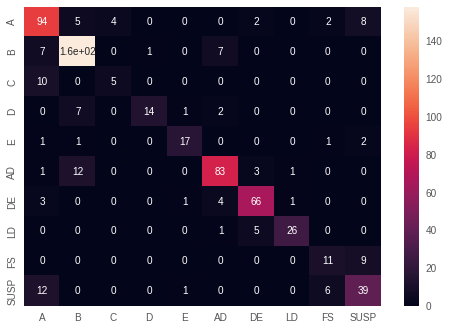

In [ ]:
print_confusion_matrix2(model_lr)

Precision:  81.01978762189985
Recall:  80.91482649842271
Accuracy:  80.91482649842271
F1 score:  80.65985659940394


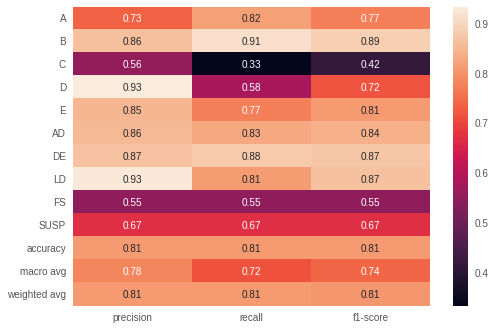

In [ ]:

accuracy, precision, recall, f1 = print_metrics2(model_lr)
accuracy_models1.append(accuracy)
precision_models1.append(precision)
recall_models1.append(recall)
f1score_models1.append(f1)

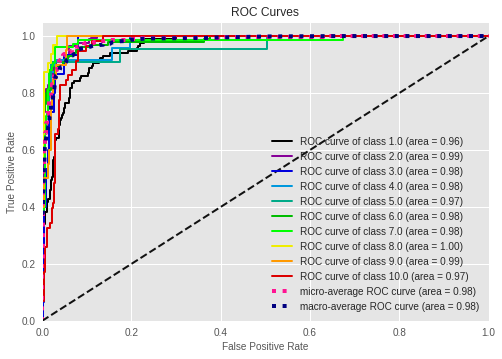

In [47]:
make_ROC2(model_lr)

K NEAREST NEIGHBORS 


In [ ]:
print(GridSearchCV_knn(x_train2, y_train2))

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=7,
                     weights='distance')


In [49]:
def train_knn(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_knn = KNeighborsClassifier(n_neighbors= 7, metric = 'manhattan', weights = 'distance', algorithm = 'ball_tree')
    model_knn.fit(x_train,y_train)
    y_pred_knn = model_knn.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_knn) 
    accuracy_scores_log.append((accuracy))
  return model_knn 
  
model_knn = train_knn(x_train2, y_train2)

Precision:  76.00412067844078
Recall:  76.02523659305994
Accuracy:  76.02523659305994
F1 score:  75.46447885537899


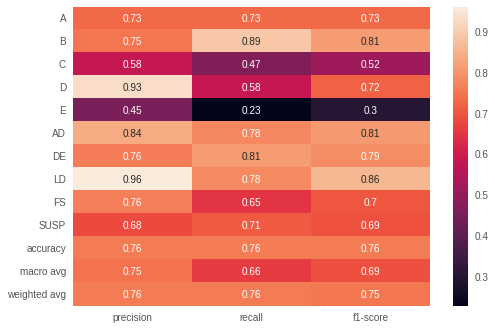

In [ ]:

accuracy, precision, recall, f1 = print_metrics2(model_knn)
accuracy_models1.append(accuracy)
precision_models1.append(precision)
recall_models1.append(recall)
f1score_models1.append(f1)

Precision:  76.00412067844078
Recall:  76.02523659305994
Accuracy:  76.02523659305994
F1 score:  75.46447885537899


(76.02523659305994, 76.00412067844078, 76.02523659305994, 75.46447885537899)

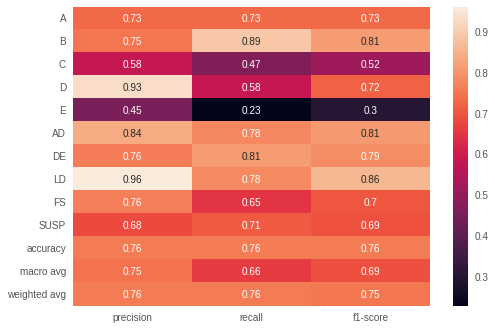

In [ ]:
print_metrics2(model_knn)

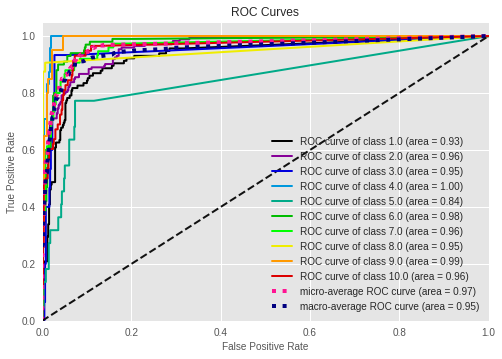

In [50]:
make_ROC2(model_knn)

DECISION TREES 

In [ ]:
print(GridSearchCV_dt(x_train2, y_train2))

DecisionTreeClassifier(max_depth=24, max_features='auto')


In [51]:
def train_dt(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_dt = DecisionTreeClassifier(max_depth = 24, criterion = "entropy", splitter = "best", max_features = "auto" , random_state=seed(7))
    model_dt.fit(x_train,y_train)
    y_pred_dt = model_dt.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_dt) 
    accuracy_scores_log.append((accuracy))
  return model_dt 

model_dt = train_dt(x_train2, y_train2)

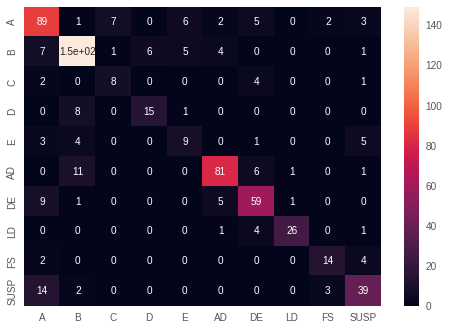

In [ ]:
print_confusion_matrix2(model_dt)

Precision:  77.35798857137739
Recall:  77.12933753943217
Accuracy:  77.12933753943217
F1 score:  77.15161783555425


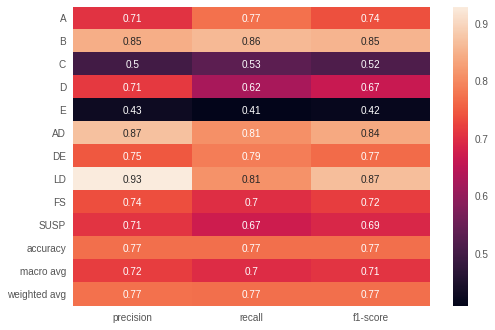

In [ ]:
accuracy, precision, recall, f1 = print_metrics2(model_dt)
accuracy_models1.append(accuracy)
precision_models1.append(precision)
recall_models1.append(recall)
f1score_models1.append(f1)

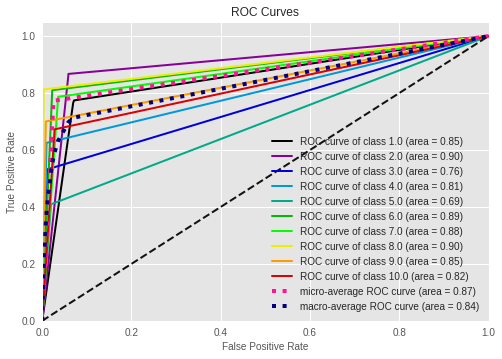

In [52]:
make_ROC2(model_dt)

RANDOM FORESTS 

In [ ]:
print(GridSearchCV_rf(x_train2, y_train2))

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=7)


In [53]:
def train_rf(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_rf = RandomForestClassifier(n_estimators=135, criterion = "entropy", max_features = 'auto', )
    model_rf.fit(x_train,y_train)
    y_pred_rf = model_rf.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_rf) 
    accuracy_scores_log.append((accuracy))
  return model_rf 
  
  
model_rf = train_rf(x_train2, y_train2)

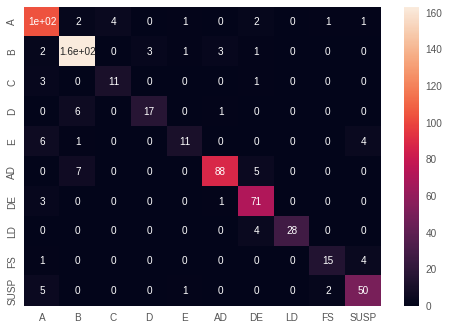

In [ ]:

print_confusion_matrix2(model_rf)

Precision:  88.09295932720596
Recall:  88.01261829652996
Accuracy:  88.01261829652996
F1 score:  87.80706683768393


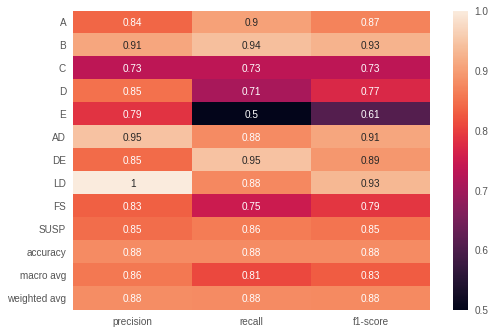

In [ ]:
accuracy, precision, recall, f1 = print_metrics2(model_rf)
accuracy_models1.append(accuracy)
precision_models1.append(precision)
recall_models1.append(recall)
f1score_models1.append(f1)

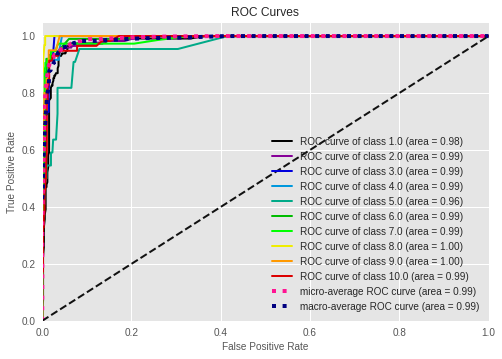

In [54]:
make_ROC2(model_rf)

NAIVE BAYES 

In [55]:
def train_nb(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_nb = GridSearchCV(estimator = GaussianNB(), param_grid = {'var_smoothing' : np.logspace(5, -10, num = 1000)}) 
    model_nb.fit(x_train,y_train)
    print(model_nb.best_estimator_)
    y_pred_nb = model_nb.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_nb) 
    accuracy_scores_log.append((accuracy))
  return model_nb
  
model_nb = train_nb(x_train, y_train)

GaussianNB(var_smoothing=0.004242556430717777)
GaussianNB(var_smoothing=0.004242556430717777)
GaussianNB(var_smoothing=0.004242556430717777)


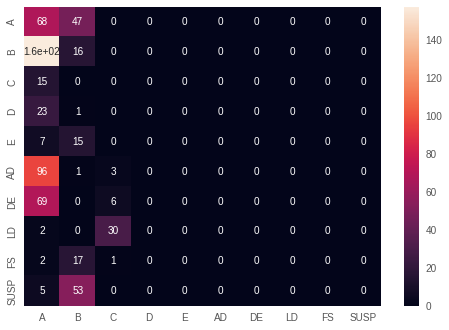

In [ ]:
print_confusion_matrix2(model_nb)

Precision:  5.688635007246994
Recall:  13.249211356466878
Accuracy:  13.249211356466878
F1 score:  7.116380438526986


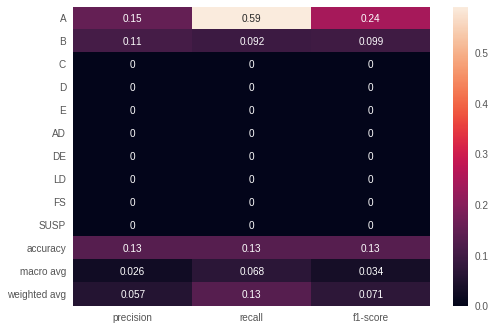

In [ ]:
accuracy, precision, recall, f1 = print_metrics2(model_nb)
accuracy_models1.append(accuracy)
precision_models1.append(precision)
recall_models1.append(recall)
f1score_models1.append(f1)

ADABOOST 

In [ ]:
print(GridSearchCV_ada(x_train2, y_train2))

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=135)


In [64]:
def train_ada(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_ada = AdaBoostClassifier(n_estimators =  135,  learning_rate = 1, algorithm = 'SAMME' )
    model_ada.fit(x_train,y_train)
    y_pred_ada = model_ada.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_ada) 
    accuracy_scores_log.append((accuracy))
  return model_ada 
  
model_ada = train_ada(x_train2, y_train2)

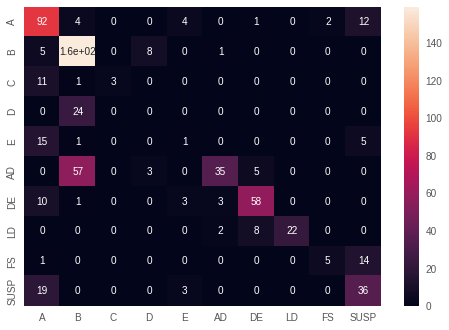

In [ ]:
print_confusion_matrix2(model_ada)

Precision:  66.36389794675337
Recall:  64.82649842271293
Accuracy:  64.82649842271293
F1 score:  61.82851995606244


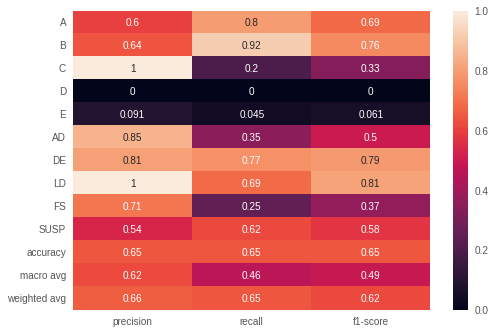

In [ ]:
accuracy, precision, recall, f1 = print_metrics2(model_ada)
accuracy_models1.append(accuracy)
precision_models1.append(precision)
recall_models1.append(recall)
f1score_models1.append(f1)

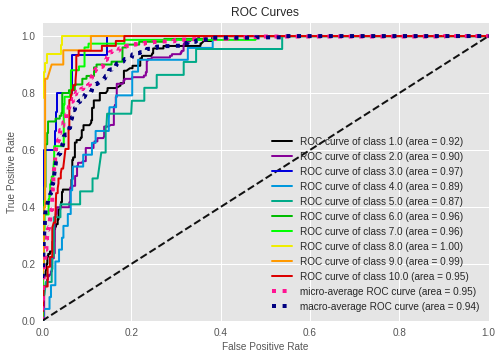

In [65]:
make_ROC2(model_ada)

BAGGING 

In [ ]:
print(GridSearchCV_bagging(x_train2, y_train2))

BaggingClassifier(max_features=10, n_estimators=160, oob_score=True)


In [66]:
def train_bagging(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_bag = BaggingClassifier(random_state = seed(7), bootstrap = True, max_features = 10, n_estimators = 400, oob_score= True)
    model_bag.fit(x_train,y_train)
    y_pred_bag = model_bag.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_bag) 
    accuracy_scores_log.append((accuracy))
  return model_bag
  
model_bag = train_bagging(x_train2, y_train2)

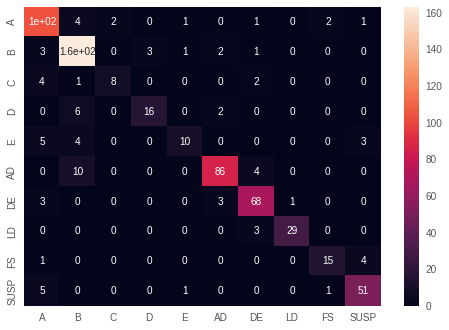

In [ ]:
print_confusion_matrix2(model_bag)

Precision:  86.68358952920435
Recall:  86.75078864353313
Accuracy:  86.75078864353313
F1 score:  86.36714582118009


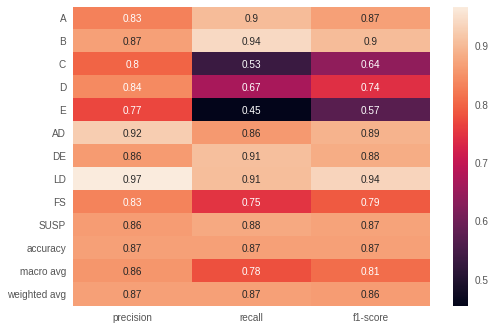

In [ ]:
accuracy, precision, recall, f1 = print_metrics2(model_bag)
accuracy_models1.append(accuracy)
precision_models1.append(precision)
recall_models1.append(recall)
f1score_models1.append(f1)

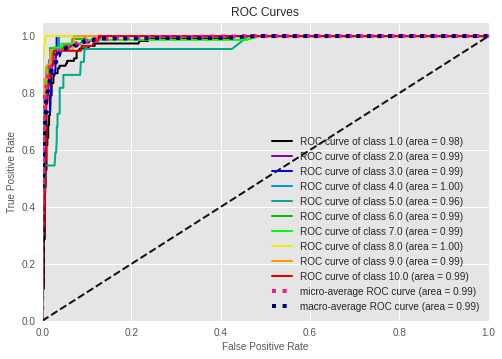

In [67]:
make_ROC2(model_bag)

SUPPORT VECTOR MACHINE 

In [ ]:
print(GridSearchCV_svc(x_train2, y_train2))

SVC(C=166.81005372000558, degree=2)


In [68]:
def train_svc(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_svc = SVC(random_state = seed(7), C =166.81005372000558, degree = 2)
    model_svc.fit(x_train,y_train)
    y_pred_svc = model_svc.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_svc) 
    accuracy_scores_log.append((accuracy))
  return model_svc
  
model_svc = train_svc(x_train2, y_train2)

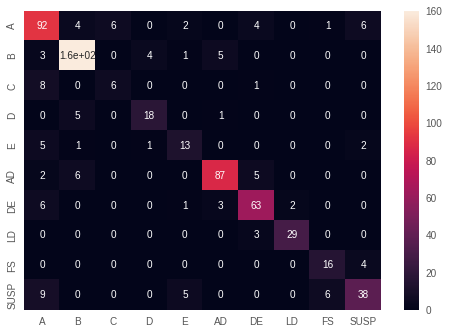

In [ ]:
print_confusion_matrix2(model_svc)

Precision:  82.32175330428818
Recall:  82.33438485804416
Accuracy:  82.33438485804416
F1 score:  82.23313860519694


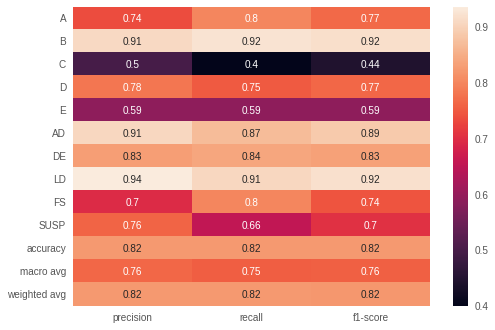

In [ ]:
accuracy, precision, recall, f1 = print_metrics2(model_svc)
accuracy_models1.append(accuracy)
precision_models1.append(precision)
recall_models1.append(recall)
f1score_models1.append(f1)

MULTI LAYER PERCEPTRON 

In [ ]:
print(GridSearchCV_mlp(x_train2, y_train2))

MLPClassifier(max_iter=300, random_state=1, solver='lbfgs')


In [70]:
def train_mlp(x_train, y_train): 
  accuracy_scores_log = []
  for train, val in kf.split(x_train):
    model_mlp = MLPClassifier(random_state=1, max_iter=300,  solver='lbfgs')
    model_mlp.fit(x_train,y_train)
    y_pred_mlp = model_mlp.predict(x_train[val])
    accuracy = accuracy_score(y_train[val], y_pred_mlp) 
    accuracy_scores_log.append((accuracy))
  return model_mlp
  
model_mlp = train_mlp(x_train2, y_train2)

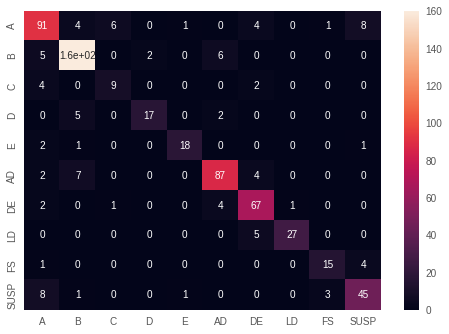

In [ ]:
print_confusion_matrix2(model_mlp)

Precision:  84.70389501783498
Recall:  84.54258675078864
Accuracy:  84.54258675078864
F1 score:  84.52664074938625


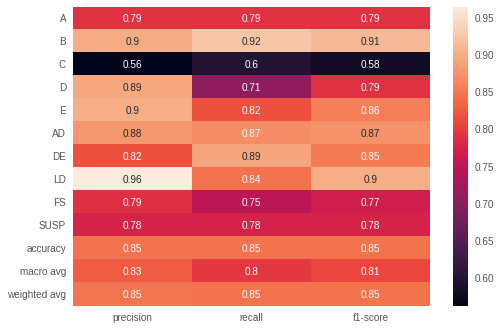

In [ ]:
accuracy, precision, recall, f1 = print_metrics2(model_mlp)
accuracy_models1.append(accuracy)
precision_models1.append(precision)
recall_models1.append(recall)
f1score_models1.append(f1)

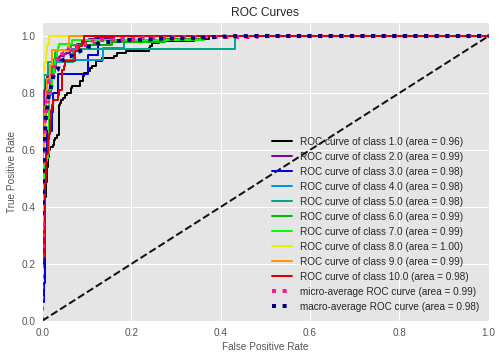

In [71]:
make_ROC2(model_mlp)

In [ ]:
accuracy_models1

[80.91482649842271,
 76.02523659305994,
 77.12933753943217,
 88.01261829652996,
 13.249211356466878,
 64.82649842271293,
 86.75078864353313,
 82.33438485804416,
 84.54258675078864]

In [ ]:
precision_models1

[81.01978762189985,
 76.00412067844078,
 77.35798857137739,
 88.09295932720596,
 5.688635007246994,
 66.36389794675337,
 86.68358952920435,
 82.32175330428818,
 84.70389501783498]

In [ ]:
recall_models1

[80.91482649842271,
 76.02523659305994,
 77.12933753943217,
 88.01261829652996,
 13.249211356466878,
 64.82649842271293,
 86.75078864353313,
 82.33438485804416,
 84.54258675078864]

In [ ]:
f1score_models1

[80.65985659940394,
 75.46447885537899,
 77.15161783555425,
 87.80706683768393,
 7.116380438526986,
 61.82851995606244,
 86.36714582118009,
 82.23313860519694,
 84.52664074938625]

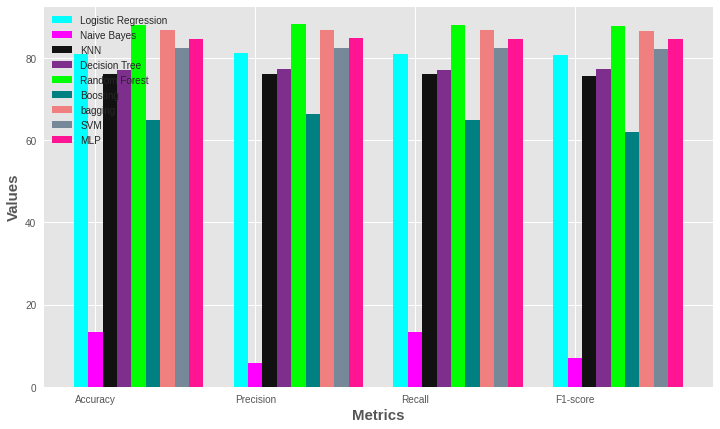

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.09
fig = plt.subplots(figsize =(12,7))
 
# set height of bar
LogisticRegression_arr = [accuracy_models1[0],precision_models1[0],recall_models1[0],f1score_models1[0]]
GaussianNB_arr = [accuracy_models1[4],precision_models1[4],recall_models1[4],f1score_models1[4]]
DecisionTreeClassifier_arr = [accuracy_models1[2],precision_models1[2],recall_models1[2],f1score_models1[2]]
RandomForestClassifier_arr = [accuracy_models1[3],precision_models1[3],recall_models1[3],f1score_models1[3]]
KNN_arr = [accuracy_models1[1],precision_models1[1],recall_models1[1],f1score_models1[1]]
Boosting_arr= [accuracy_models1[5],precision_models1[5],recall_models1[5],f1score_models1[5]]
Bagging_arr= [accuracy_models1[6],precision_models1[6],recall_models1[6],f1score_models1[6]]
SVM_arr= [accuracy_models1[7],precision_models1[7],recall_models1[7],f1score_models1[7]]
MLP_arr= [accuracy_models1[8],precision_models1[8],recall_models1[8],f1score_models1[8]]
# Set position of bar on X axis
br1 = np.arange(len(LogisticRegression_arr))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]


# Make the plot
plt.bar(br1, LogisticRegression_arr, color ='#00FFFF', width = barWidth,label ='Logistic Regression')
plt.bar(br2, GaussianNB_arr, color ='#FF00FF', width = barWidth, label ='Naive Bayes')
plt.bar(br3, KNN_arr, color ='k', width = barWidth, label ='KNN')
plt.bar(br4, DecisionTreeClassifier_arr, color ='#7E2F8E', width = barWidth, label ='Decision Tree')
plt.bar(br5, RandomForestClassifier_arr, color ='#00FF00', width = barWidth, label ='Random Forest')
plt.bar(br6, Boosting_arr, color ='teal', width = barWidth, label ='Boosting')
plt.bar(br7,Bagging_arr, color ='lightcoral', width = barWidth, label ='bagging')
plt.bar(br8, SVM_arr, color ='lightslategrey', width = barWidth, label ='SVM')
plt.bar(br9, MLP_arr, color ='deeppink', width = barWidth, label ='MLP')



# Adding Xticks
plt.xlabel('Metrics', fontweight ='bold', fontsize = 15)
plt.ylabel('Values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(LogisticRegression_arr))],
        ['Accuracy', 'Precision', 'Recall', 'F1-score'])
 
plt.legend()
plt.show()

In [46]:
def make_ROC2(model):
  y_pred = model.predict_proba(x_test2)
  skplt.metrics.plot_roc_curve(y_test2, y_pred)
  plt.show()

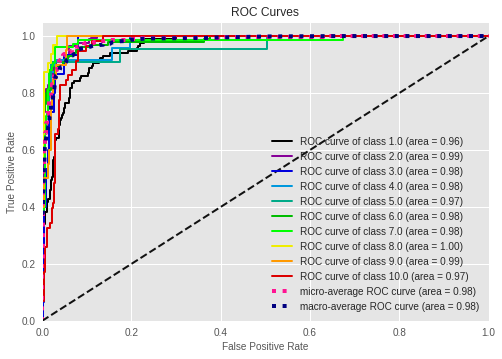

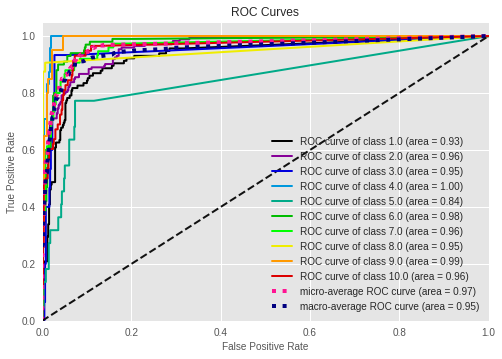

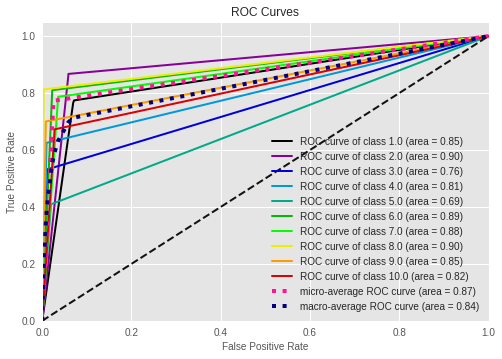

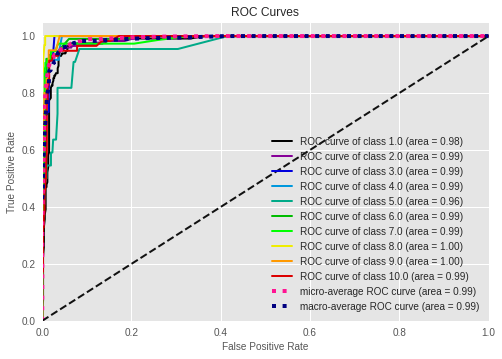

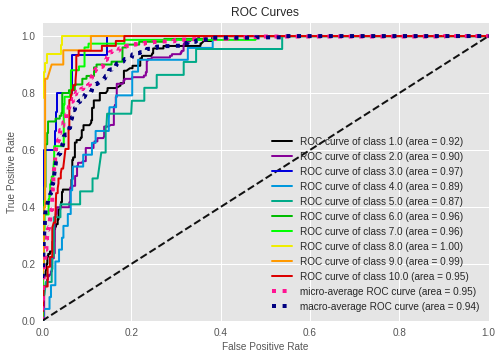

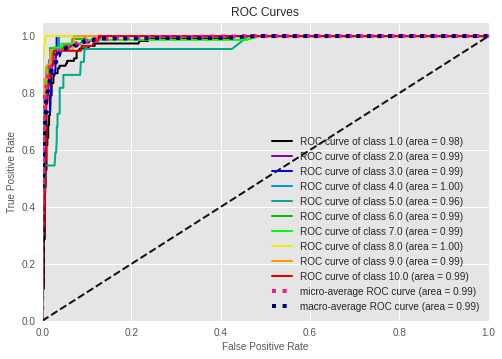

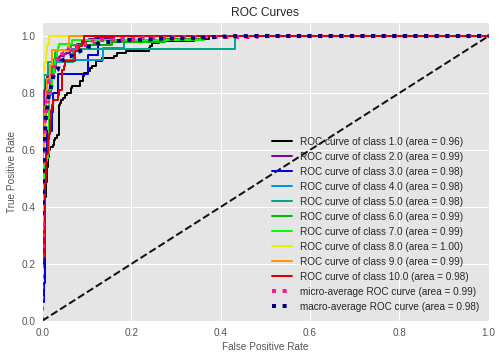

In [ ]:
make_ROC2(model_lr)
make_ROC2(model_knn)
make_ROC2(model_dt)

make_ROC2(model_rf)
#make_ROC2(model_nb)
make_ROC2(model_ada)
make_ROC2(model_bag)
#ake_ROC(model_svc)
make_ROC2(model_mlp)